# Airline Analysis

In this project, the focus will be on analyzing the `flight.csv` dataset, which contains valuable information about airline prices. The goal is to gain a comprehensive understanding of the factors that influence airline prices and use this knowledge to find the best deals for clients. By exploring the dataset, I aim to uncover patterns and insights that will help clients comprehend how airline prices fluctuate based on various factors. Ultimately, the aim is to utilize this understanding to assist clients in securing the most advantageous and cost-effective airline options available.

The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

**During the course of the project, I will pose questions and subsequently provide visualizations to illustrate the answers.**

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment   
0    792         172      0            No                    Yes  \
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price   
0           Yes      Sunday    Yes     Yes      338.820           1571.02  \
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


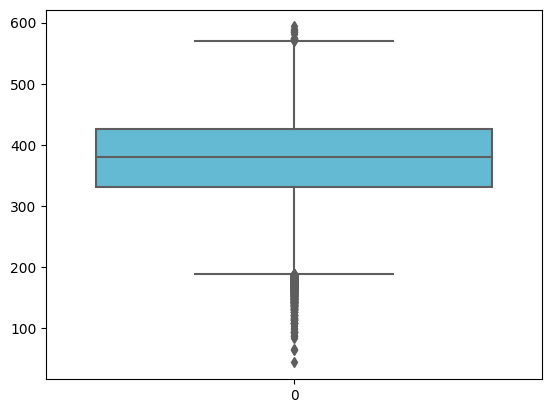

44.415
593.635
376.58525308213905
380.56


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

flight = pd.read_csv("flight.csv")
print(flight.head())

sns.boxplot(flight.coach_price, color = '#52c4e6')
plt.show()

print(flight.coach_price.min())
print(flight.coach_price.max())
print(flight.coach_price.mean())
print(flight.coach_price.median())

2. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

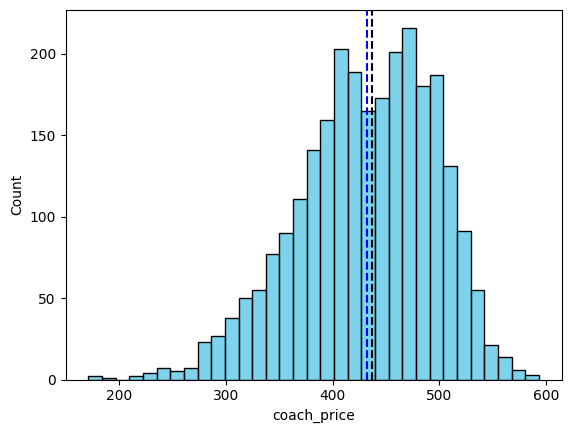

170.77
593.635
431.834377372817
437.115


In [2]:
sns.histplot(flight.coach_price[flight.hours == 8], color = '#52c4e6')
plt.axvline(flight.coach_price[flight.hours == 8].mean(), linestyle = '--', color = 'blue')
plt.axvline(flight.coach_price[flight.hours == 8].median(), linestyle = '--', color = 'black')

plt.show()

print(flight.coach_price[flight.hours == 8].min())
print(flight.coach_price[flight.hours == 8].max())
print(flight.coach_price[flight.hours == 8].mean())
print(flight.coach_price[flight.hours == 8].median())

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. What kinds of delays are typical?

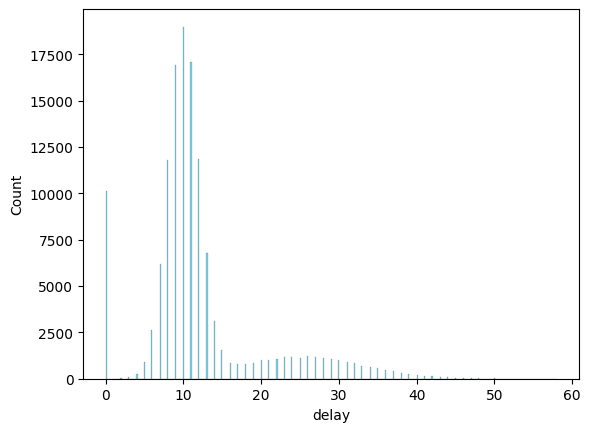

In [3]:
sns.histplot(flight.delay[flight.delay <= 500], color = '#52c4e6')
plt.show()

## Bivariate Analysis

4. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

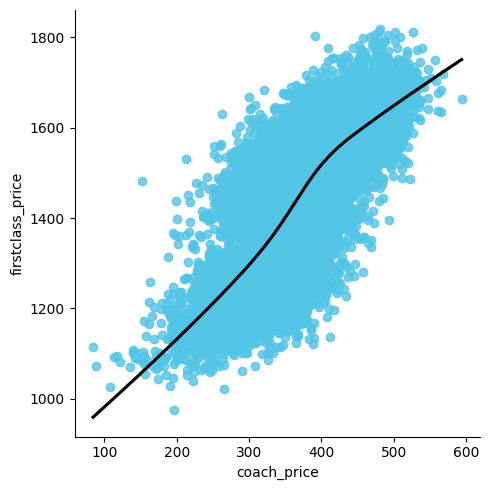

In [4]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, scatter_kws={'color': '#52c4e6'}, line_kws={'color': 'black'}, lowess=True)
plt.show()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

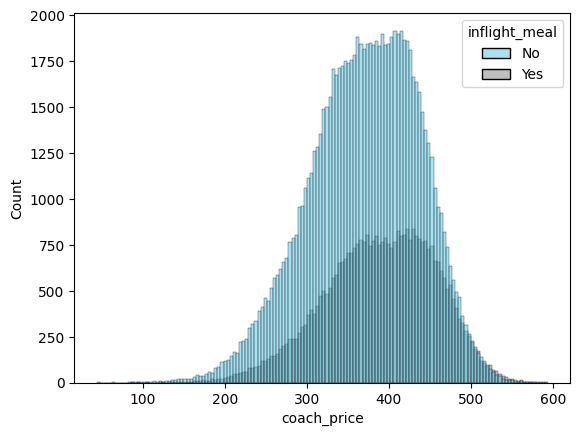

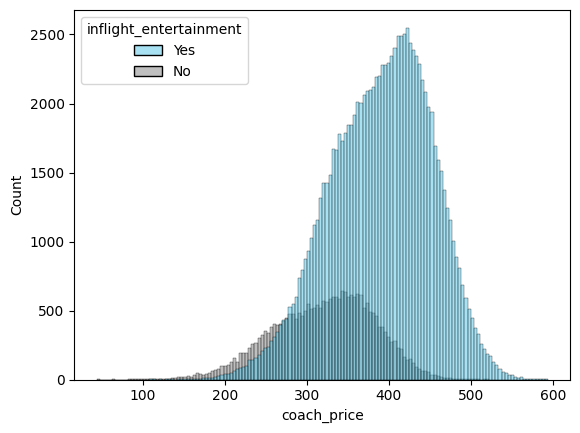

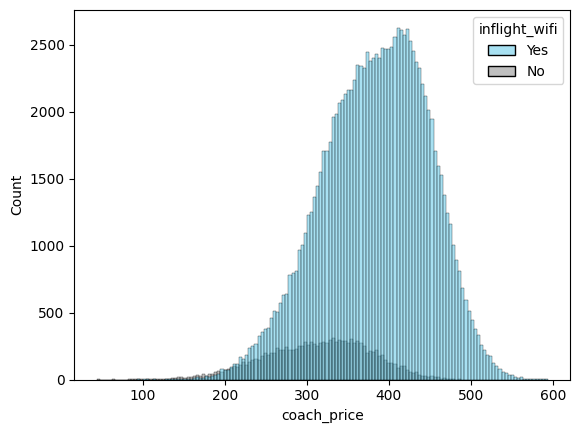

In [5]:
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal, palette=["#52c4e6", "gray"])
plt.show()
plt.clf()

sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment, palette=["#52c4e6", "gray"])
plt.show()
plt.clf()

sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi, palette=["#52c4e6", "gray"])
plt.show()

6. How does the number of passengers change in relation to the length of flights?

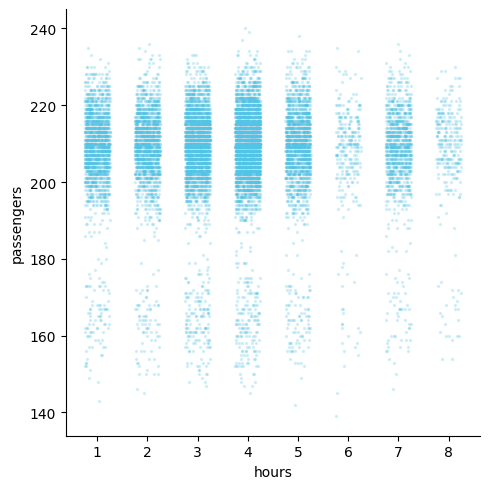

In [6]:
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"color": "#52c4e6", "s": 2, "alpha":0.2}, fit_reg = False)
plt.show()

## Multivariate Analysis

8. How do coach and first-class prices on weekends compare to weekdays in terms of their relationship?

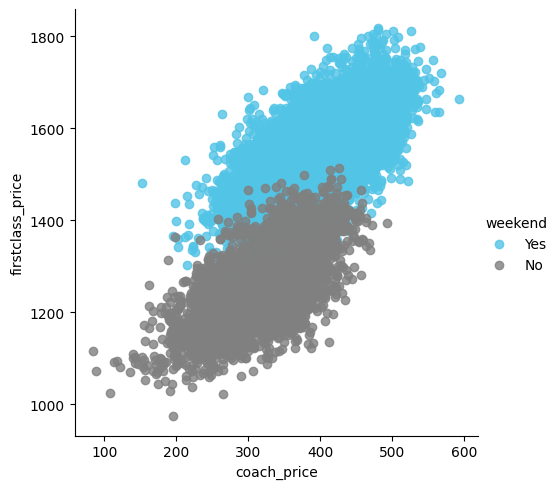

In [7]:
sns.lmplot(x = 'coach_price', y = 'firstclass_price', hue = 'weekend', data = flight_sub, fit_reg=False, palette=["#52c4e6", "gray"])
plt.show()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

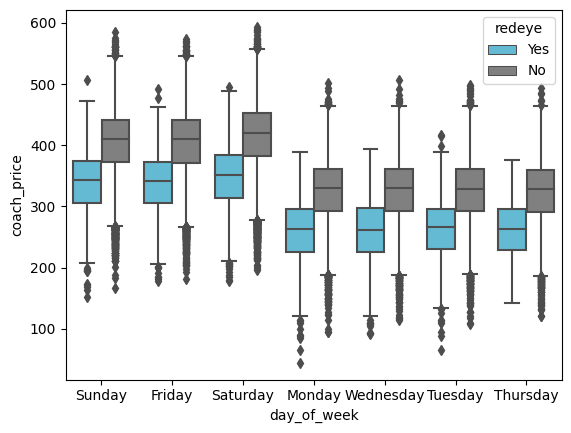

In [8]:
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight, palette=["#52c4e6", "gray"])
plt.show()

Based on the analysis of the `flight.csv` dataset, several conclusions can be drawn regarding the factors that influence airline prices:

1. Flight Duration: The duration of the flight may have a minimal impact on ticket prices. Longer flights with more amenities and services may have slightly higher prices compared to shorter flights.

2. Passengers: The number of passengers on a flight does not have a significant impact on the ticket prices. Prices are usually determined based on other factors such as demand, seasonality, and competition.

3. Take-off Delay: Flights with longer take-off delays do not necessarily have lower prices. The delay itself does not directly affect the ticket prices, as prices are typically set based on other factors.

4. Inflight Amenities: The availability of inflight meals, entertainment systems, and Wi-Fi may influence ticket prices. Flights offering these amenities may have slightly higher prices due to the added convenience and comfort provided to passengers.

5. Day of the Week: The day of the week on which the flight takes place can have an impact on ticket prices. While prices are usually determined based on demand and supply factors, it has been observed that ticket prices tend to be higher on Fridays, Sundays, and Saturdays compared to other days of the week. This can be attributed to increased travel demand during weekends and higher competition for limited available seats.

6. Class Differences: First-class seats generally have higher prices compared to coach tickets. The additional amenities and enhanced services provided in first class contribute to the higher ticket prices.

7. Redeye Flights: Redeye flights, which take place overnight, may offer lower prices compared to daytime flights. This is because redeye flights are often less desirable to passengers, resulting in potentially lower demand and, consequently, lower prices.

**Thank you for attention!**